In [1]:
# https://qiskit.github.io/qiskit-aer/tutorials/3_building_noise_models.html
import qiskit
qiskit.__version__

'1.2.0'

In [2]:
import numpy as np

# Importing standard Qiskit libralies
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import EstimatorV2 as Estimator
from qiskit_ibm_runtime import SamplerV2
#from qiskit_ibm_provider import IBMProvider
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit.providers.fake_provider import GenericBackendV2, FakeQasmBackend
from qiskit_aer import StatevectorSimulator, AerSimulator
from qiskit import ClassicalRegister, QuantumRegister
# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError, pauli_error, depolarizing_error, thermal_relaxation_error)

In [3]:
# ノイズモデルの設定
noise_bit_flip = NoiseModel()
p_gate1 = 0.1
error = pauli_error([('I', 1 - p_gate1),('X',p_gate1)])
noise_bit_flip.add_all_qubit_quantum_error(error,["id"])

In [4]:
# 量子回路の初期化
circuit = QuantumCircuit(3,1)

In [5]:
# 量子状態を反復
circuit.cx(0,[1,2])
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [6]:
# エラー発生
circuit.id([0,1,2])
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [7]:
# 誤り検出・訂正
circuit.cx(0,[1,2])
circuit.ccx(1,2,0)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [8]:
# 測定
circuit.measure(0,0)

{'0': 1000}


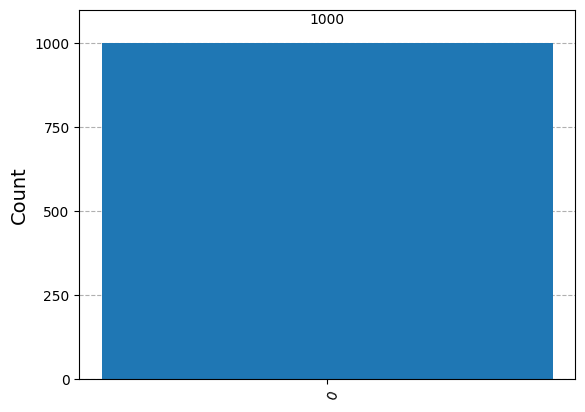

In [9]:
# 実行と結果取得
backend = AerSimulator(noise_model=noise_bit_flip)
transpiled_circuit = transpile(circuit, backend)
result = backend.run(transpiled_circuit, shots=1000, optimization_level = 0).result()
print(result.get_counts(circuit))
plot_histogram(result.get_counts(circuit))